In [10]:
from google.colab import drive
from collections import defaultdict
#import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests as rq

drive.mount('/content/drive') #data mounted at '/content/drive/My Drive/' to access data, '/content/drive/My Drive/Big Data Final Project'
root_path = '/content/drive/My Drive/Big_Data_Final_Project'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
#get data and read file
file = '/content/drive/My Drive/Big_Data_Final_Project/master.csv'
data = pd.read_csv(file)

In [12]:
data

,entry
0,"The player ""Rusk 👻 @ LbvFYj-_6E"" sit back with..."
1,-- ending hand #220 --
2,"""Coia @ JDqtu4x_0y"" collected 2.00 from pot"
3,"Uncalled bet of 2.00 returned to ""Coia @ JDqtu..."
4,"""Frink @ k9Gbwr77s4"" folds"
...,...
64421,"The admin approved the player ""Smokiano @ 6FEt..."
64422,"The player ""Smokiano @ 6FEtPFXtYO"" requested a..."
64423,The game's ante was changed from 0.00 to 0.00.
64424,The game's big blind was changed from 0.20 to ...


In [13]:
data = data.iloc[::-1]

In [14]:
def isolateHandNumber(string):
  """
  Returns the number of a hand by indexing from # to the space character
  """
  if "starting hand #" in string:
    firstNum = string.index("#") + 1
    space = string.find(" ",firstNum)
    handNumber = string[firstNum:space]

    return handNumber

In [15]:
def isolateUser(string):
  """
  Isolates username from chunk of text
  """
  if "@" in string and "starting hand" not in string and "Player stacks" not in string and "Uncalled bet" not in string:
    at = string.index("@")
    space = at - 1
    user = string[:space]
    user = user.replace('"','')

    return user

In [16]:
def isolateBetAmount(string):
  """
  Isolates bet amount from chunk of text
  """
  bet = 0
  if "raises" in string or "calls" in string:
    firstInstanceOfSpaceAfterAt = string.find(" ", string.index("@"))
    secondInstanceOfSpaceAfterAt = firstInstanceOfSpaceAfterAt + 11
    
    if "raises" in string:
      bet = string[string.rfind(" ")+1:]
    if "calls" in string:
      bet = string[string.rfind(" ")+1:]
    if "all in" in string:
      if "raises" in string:
        ind = string.index("raises")
        start = ind + 10
      if "calls" in string:
        ind = string.index("calls")
        start = ind + 6
      bet = string[start:-14]
  
  return bet

In [18]:
temp = []
currentHand = 0
pot = 0
preflop = True

# Iterate through the rows
for i in data['entry'].tolist():
  
  # Check if it's a win ("collected")
  if "collected" in i:
    row[4] = 1

  # If this is the beginning of the hand
  if "-- starting" in i:
    preflop = True

    # Set the current hand number
    #currentHand = isolateHandNumber(i[:(len(i)//2)])
    currentHand += 1
    pot = 1.50

  # If this is the flop
  if "-- flop" in i or "Uncalled bet" in i:
    preflop = False

  # Skip to the next iteration (next hand)
  if preflop == False:
    continue

  # If money is being bet
  if "raises" in i or "calls" in i:

    # Initialize the array to store data
    row = [0,"","",0,0]
    # Hand number, user, bet type, bet amount, win/loss

    # Store the current hand
    row[0] = currentHand

    # Store the user
    row[1] = isolateUser(i)

    # Store the bet type
    if "raises" in i:
      row[2] = "raise"
    if "calls" in i: 
      row[2] = "call"

    # Add bet amount to pot
    bet = isolateBetAmount(i)
    pot += int(float(bet))

    # Store the bet amount
    row[3] = round((int(float(bet)) / pot),3)

    # Append row to temp matrix
    temp.append(row)

temp

[[1, 'Alex', 'raise', 0.769, 0],
 [1, 'Frink', 'raise', 0.735, 0],
 [1, 'Alex', 'call', 0.424, 0],
 [1, 'Alex', 'call', 0.22, 1],
 [3, 'Frink', 'raise', 0.8, 0],
 [3, 'Smokiano', 'raise', 0.694, 1],
 [4, 'Smokiano', 'call', 0.571, 0],
 [4, 'Alex', 'call', 0.364, 0],
 [4, 'Bunk', 'call', 0.267, 0],
 [4, 'Smokiano', 'call', 0.348, 0],
 [4, 'Alex', 'call', 0.258, 1],
 [6, 'Alex', 'call', 0.571, 0],
 [6, 'Frink', 'raise', 0.72, 0],
 [6, 'Rusk', 'call', 0.419, 0],
 [6, 'Alex', 'call', 0.295, 0],
 [6, 'Rusk', 'call', 0.315, 0],
 [6, 'Rusk', 'call', 0.395, 1],
 [7, 'Rusk', 'call', 0.571, 1],
 [8, 'Frink', 'raise', 0.8, 0],
 [8, 'Rusk', 'call', 0.444, 1],
 [9, 'Smokiano', 'raise', 0.824, 0],
 [9, 'Bunk', 'call', 0.452, 1],
 [10, 'Alex', 'call', 0.571, 0],
 [10, 'Alex', 'call', 0.364, 0],
 [10, 'Rusk', 'call', 0.476, 0],
 [10, 'Rusk', 'call', 0.462, 1],
 [11, 'Smokiano', 'call', 0.571, 0],
 [11, 'Bunk', 'raise', 0.696, 0],
 [11, 'Jett', 'call', 0.41, 0],
 [11, 'Smokiano', 'call', 0.291, 1],
 [1

In [19]:
# All possible hand-user combinations
# This can be used to find the necessary DataFrame size
l = []

for i in temp:
  l.append([i[0],i[1]])

# Remove duplicates
handUserCombos = []
for i in l:
  if i not in handUserCombos:
    handUserCombos.append(i)

In [20]:
# Add empty cells for bet type, bet amount, and win/loss value
for i in handUserCombos:
  i.append("call amount: ")
  i.append(0)
  i.append("raise amount: ")
  i.append(0)
  i.append(0)

In [21]:
# Populate these lists
for i in handUserCombos:
  for j in temp:

    # If the hand number and user match
    if i[0] == j[0] and i[1] == j[1]:

      # Find bet type
      if j[2] == "call":

        # Increment bet amount
        i[3] += j[3]

      if j[2] == "raise":

        # Increment bet amount
        i[5] += j[3]

      # Win/loss
      i[6] = j[4]

In [22]:
game = pd.DataFrame(handUserCombos)
game.columns = ['hand', 'user', 'call', 'call amount', 'raise', 'raise amount', 'win/loss']
game = game.drop(columns=['call','raise'])
game

,hand,user,call amount,raise amount,win/loss
0,1,Alex,0.644,0.769,1
1,1,Frink,0.000,0.735,0
2,3,Frink,0.000,0.800,0
3,3,Smokiano,0.000,0.694,1
4,4,Smokiano,0.919,0.000,0
...,...,...,...,...,...
6510,3559,Coia,0.000,0.667,0
6511,3559,Jon Shemz,0.400,0.000,1
6512,3560,Jon Shemz,0.258,0.727,1
6513,3560,Coia,0.595,0.000,0


In [23]:
# Get list of call and raise values
# Get list of win/loss values

winloss = []
callsraises = []

for i in handUserCombos:
  callsraises.append([i[3],i[5]])
  winloss.append(i[6])

In [24]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pylab as plt
from scipy.interpolate import interp1d

In [25]:
# Miscellaneous functions
def sigmoid(z):
    """The sigmoid function."""
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z) * (1 - sigmoid(z))

def step(z, threshold=0.5):
    if z > threshold:
        return 1
    return 0

# Feed forward neural network class
class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        
        self.num_layers = len(sizes)
        self.sizes = sizes
        
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x) for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a) + b)
        return a
    
    def SGD(self, training_data, epochs, mini_batch_size, eta, test_data=None, silent=False):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  ``epochs`` represents the number of training iterations
        over the training data.  ``eta`` is the learning rate.
        If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        
        n = len(training_data)
        if test_data:
            n_test = len(test_data)
        
        for j in range(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in range(0, n, mini_batch_size)
            ]
            
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            
            if not silent:
                if test_data:
                    print("Epoch {0}: {1} / {2}".format(j, self.evaluate(test_data), n_test))
                else:
                    print("Epoch {0} complete".format(j))

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""

        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
            
        self.weights = [
            w - eta / len(mini_batch) * nw
            for w, nw in zip(self.weights, nabla_w)
        ]
        self.biases = [
            b - eta / len(mini_batch) * nb
            for b, nb in zip(self.biases, nabla_b)
        ]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book. Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on. It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return nabla_b, nabla_w

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        if self.sizes[-1] == 1:
            test_results = [
                (step(self.feedforward(x)), y)
                for x, y in test_data
            ]
        else:
            test_results = [
                (np.argmax(self.feedforward(x)), y)
                for x, y in test_data
            ]
        return sum(int(y_pred == y) for (y_pred, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return output_activations - y

In [26]:
def prepare_data(X, y):
    """Format the dataset X and y so it fits with Nielsen's code."""
    return [
        (X[i].reshape(-1, 1), y[i].reshape(-1, 1))  # our tuple (x, y)
        for i in range(len(y))
    ]

In [27]:
# Basic Perceptron - a logistic regression with two variables
# Network with 2 inputs and 1 output
net = Network([2,1])

# INPUTS (call and raise)
inputs = np.vstack([callsraises[:int(len(callsraises)*0.75)]])   # use 3/4 for training
test_inputs = np.vstack([callsraises[int(len(callsraises)*0.75):]])   # use 1/4 for testing

# OUTPUT (win or loss)
output = np.array(winloss[:int(len(callsraises)*0.75)])
test_output = np.array(winloss[int(len(callsraises)*0.75):])

# Prepare data
training_data = prepare_data(inputs,output)
test_data = prepare_data(test_inputs, test_output)

In [28]:
net.SGD(
    training_data,
    epochs=100,
    mini_batch_size=10,
    eta=1,
    test_data=test_data)

# Get predictions
y_pred = []
for x in test_inputs:
    y_pred.append(net.feedforward(x.reshape(-1, 1))[0][0])

Epoch 0: 1170 / 1629
Epoch 1: 1193 / 1629
Epoch 2: 1205 / 1629
Epoch 3: 1191 / 1629
Epoch 4: 1192 / 1629
Epoch 5: 1191 / 1629
Epoch 6: 1158 / 1629
Epoch 7: 1183 / 1629
Epoch 8: 1195 / 1629
Epoch 9: 1193 / 1629
Epoch 10: 1132 / 1629
Epoch 11: 1191 / 1629
Epoch 12: 1195 / 1629
Epoch 13: 1162 / 1629
Epoch 14: 1197 / 1629
Epoch 15: 1209 / 1629
Epoch 16: 1193 / 1629
Epoch 17: 1197 / 1629
Epoch 18: 1204 / 1629
Epoch 19: 1192 / 1629
Epoch 20: 1199 / 1629
Epoch 21: 1195 / 1629
Epoch 22: 1192 / 1629
Epoch 23: 1191 / 1629
Epoch 24: 1196 / 1629
Epoch 25: 1195 / 1629
Epoch 26: 1190 / 1629
Epoch 27: 1176 / 1629
Epoch 28: 1188 / 1629
Epoch 29: 1192 / 1629
Epoch 30: 1190 / 1629
Epoch 31: 1205 / 1629
Epoch 32: 1199 / 1629
Epoch 33: 1194 / 1629
Epoch 34: 1194 / 1629
Epoch 35: 1193 / 1629
Epoch 36: 1195 / 1629
Epoch 37: 1187 / 1629
Epoch 38: 1188 / 1629
Epoch 39: 1194 / 1629
Epoch 40: 1181 / 1629
Epoch 41: 1205 / 1629
Epoch 42: 1205 / 1629
Epoch 43: 1191 / 1629
Epoch 44: 1195 / 1629
Epoch 45: 1193 / 162

In [29]:
# The y_pred is the prediction of either being a 0 or a 1, and the closer it is to 0 or to 1, the more confident the prediction is.
y_pred

[0.27570701265959574,
 0.4302151459500795,
 0.28160712208939204,
 0.44261527957405955,
 0.3690678314246101,
 0.29684914915811983,
 0.3038287414677002,
 0.29556088462159,
 0.4707552281408342,
 0.38311539546342144,
 0.29684914915811983,
 0.29684914915811983,
 0.29684914915811983,
 0.4707552281408342,
 0.2915560668688607,
 0.30661348266652916,
 0.7149648815690036,
 0.5733885789147177,
 0.30661348266652916,
 0.4872681875669262,
 0.39058971020178096,
 0.29684914915811983,
 0.915912632377,
 0.6046522840971679,
 0.403627462982147,
 0.4872681875669262,
 0.5637306556189391,
 0.6797469655787104,
 0.2885338626960688,
 0.7200743345616125,
 0.30661348266652916,
 0.4872681875669262,
 0.30661348266652916,
 0.29684914915811983,
 0.701289631171245,
 0.7811792406409308,
 0.6728486566834408,
 0.6372710494847444,
 0.2885338626960688,
 0.4558689049976183,
 0.37569593336996093,
 0.4707552281408342,
 0.29684914915811983,
 0.8949445676125392,
 0.6653472954388576,
 0.5229263248530706,
 0.30661348266652916,
 0.

AttributeError: ignored

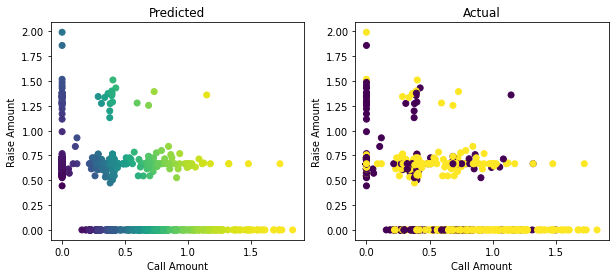

In [31]:
# Plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Predicted")
plt.xlabel("Call Amount")
plt.ylabel("Raise Amount")
plt.scatter(test_inputs[:, 0], test_inputs[:, 1], c=list(y_pred))
plt.subplot(1, 2, 2)
plt.title("Actual")
plt.xlabel("Call Amount")
plt.ylabel("Raise Amount")
plt.scatter(test_inputs[:, 0], test_inputs[:, 1], c=list(test_output.reshape(-1)))
plt.show()